## Laptop Price Prediction for SmartTech Co.

### Import Required Libraries and Load the Dataset


In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"D:\ML\laptop.csv")

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Inspect the Dataset Structure

In [8]:
df.shape

(1303, 13)

In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [10]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [12]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [13]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [14]:
df.duplicated().sum()

0

###  Data Cleaning

In [15]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True) #Drop unnecessary columns

In [16]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [17]:
# Handle missing values

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [20]:
# Fix Data Types and Clean Formatting

In [21]:
# Columns to Clean:
# Ram — e.g., '8GB' → convert to integer (just 8)
# Weight — e.g., '2.1kg' → convert to float (just 2.1)
# Inches — ensure it's in float format 

In [22]:
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

In [23]:
# Find rows where Weight is '?'
df[df['Inches'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [24]:
df[df['Weight'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [25]:
# Drop rows with invalid Weight
df = df[df['Weight'] != '?']
df = df[df['Inches'] != '?']

In [26]:
df['Inches'] = df['Inches'].astype(float)
df['Weight'] = df['Inches'].astype(float)
# Optional: Check the result
df[['Ram', 'Weight', 'Inches']].head()

,Ram,Weight,Inches
0,8,13.3,13.3
1,8,13.3,13.3
2,8,15.6,15.6
3,16,15.4,15.4
4,8,13.3,13.3


### Extracting Meaningful Insights from Features

In [27]:
# Feature 1: ScreenResolution

# From this column, let’s extract:
# Touchscreen → binary (1 if touchscreen, 0 if not)
# IPS Panel → binary (1 if IPS, 0 if not)
# Resolution Width & Height → extract numeric values
# PPI (Pixels Per Inch) → derived using width, height, and inches

In [28]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS Technology'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [29]:
resolution_split = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df['X_res'] = resolution_split[0].astype(int)
df['Y_res'] = resolution_split[1].astype(int)

In [30]:
# Calculate PPI
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2) ** 0.5) / df['Inches']

In [31]:
# Feature 2: CPU

In [32]:
# Function to simplify CPU types
def extract_cpu(text):
    text = text.lower()
    if 'intel core i3' in text:
        return 'Intel Core i3'
    elif 'intel core i5' in text:
        return 'Intel Core i5'
    elif 'intel core i7' in text:
        return 'Intel Core i7'
    elif 'intel core i9' in text:
        return 'Intel Core i9'
    elif 'intel celeron' in text:
        return 'Intel Celeron'
    elif 'intel pentium' in text:
        return 'Intel Pentium'
    elif 'amd ryzen 5' in text:
        return 'AMD Ryzen 5'
    elif 'amd ryzen 7' in text:
        return 'AMD Ryzen 7'
    elif 'amd ryzen 3' in text:
        return 'AMD Ryzen 3'
    elif 'apple m1' in text or 'apple m2' in text:
        return 'Apple Silicon'
    else:
        return 'Other'

# Apply function to Cpu column
df['Cpu_brand'] = df['Cpu'].apply(extract_cpu)

# Preview result
df[['Cpu', 'Cpu_brand']].head()


,Cpu,Cpu_brand
0,Intel Core i5 2.3GHz,Intel Core i5
1,Intel Core i5 1.8GHz,Intel Core i5
2,Intel Core i5 7200U 2.5GHz,Intel Core i5
3,Intel Core i7 2.7GHz,Intel Core i7
4,Intel Core i5 3.1GHz,Intel Core i5


In [33]:
# Feature 3: CPU

In [34]:
import re

# Clean up and standardize the Memory column
df['Memory'] = df['Memory'].str.replace(r'\s+', ' ')  # Remove extra spaces
df['Memory'] = df['Memory'].str.replace('GB', '').str.replace('TB', '000')

# Split the memory column into multiple components
def parse_memory(mem_string):
    mem_string = mem_string.upper()
    ssd = hdd = flash = hybrid = 0
    parts = mem_string.split('+')
    
    for part in parts:
        part = part.strip()
        if 'SSD' in part:
            ssd += int(re.findall(r'\d+', part)[0])
        elif 'HDD' in part:
            hdd += int(re.findall(r'\d+', part)[0])
        elif 'FLASH' in part or 'EMMC' in part:
            flash += int(re.findall(r'\d+', part)[0])
        elif 'HYBRID' in part:
            hybrid += int(re.findall(r'\d+', part)[0])
    
    return pd.Series([ssd, hdd, flash, hybrid])

# Apply the function and create new columns
df[['SSD', 'HDD', 'Flash_Storage', 'Hybrid']] = df['Memory'].apply(parse_memory)

# Preview result
df[['Memory', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid']].head()


,Memory,SSD,HDD,Flash_Storage,Hybrid
0,128 SSD,128,0,0,0
1,128 Flash Storage,0,0,128,0
2,256 SSD,256,0,0,0
3,512 SSD,512,0,0,0
4,256 SSD,256,0,0,0


In [35]:
# Feature 3: GPU

In [36]:
# Function to extract GPU brand
def extract_gpu_brand(gpu):
    gpu = gpu.lower()
    if 'nvidia' in gpu:
        return 'Nvidia'
    elif 'amd' in gpu:
        return 'AMD'
    elif 'intel' in gpu:
        return 'Intel'
    else:
        return 'Other'

# Apply the function
df['Gpu_brand'] = df['Gpu'].apply(extract_gpu_brand)

# Preview result
df[['Gpu', 'Gpu_brand']].head()


,Gpu,Gpu_brand
0,Intel Iris Plus Graphics 640,Intel
1,Intel HD Graphics 6000,Intel
2,Intel HD Graphics 620,Intel
3,AMD Radeon Pro 455,AMD
4,Intel Iris Plus Graphics 650,Intel


In [37]:
# Function to group OS types
def categorize_os(os):
    os = os.lower()
    if 'windows' in os:
        return 'Windows'
    elif 'mac' in os or 'macos' in os:
        return 'Mac'
    elif 'linux' in os:
        return 'Linux'
    elif 'chrome' in os:
        return 'Chrome OS'
    elif 'no os' in os:
        return 'No OS'
    else:
        return 'Other'

# Apply the function
df['OS_Category'] = df['OpSys'].apply(categorize_os)

# Preview result
df[['OpSys', 'OS_Category']].head()


,OpSys,OS_Category
0,macOS,Mac
1,macOS,Mac
2,No OS,No OS
3,macOS,Mac
4,macOS,Mac


In [38]:
cleaned_df = df.drop(columns=['ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'])


In [39]:
cleaned_df.sample()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS Technology,X_res,Y_res,PPI,Cpu_brand,SSD,HDD,Flash_Storage,Hybrid,Gpu_brand,OS_Category
860,Lenovo,Notebook,15.6,8,15.6,45323.1648,0,1,1920,1080,141.211998,Intel Core i5,0,1000,0,0,Intel,Windows


## Visualizing Features Info

<Axes: xlabel='count', ylabel='Company'>

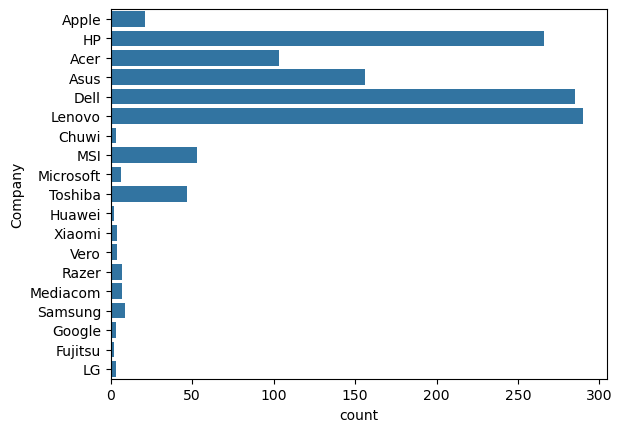

In [40]:
sns.countplot(cleaned_df,y='Company')

<Axes: xlabel='count', ylabel='OS_Category'>

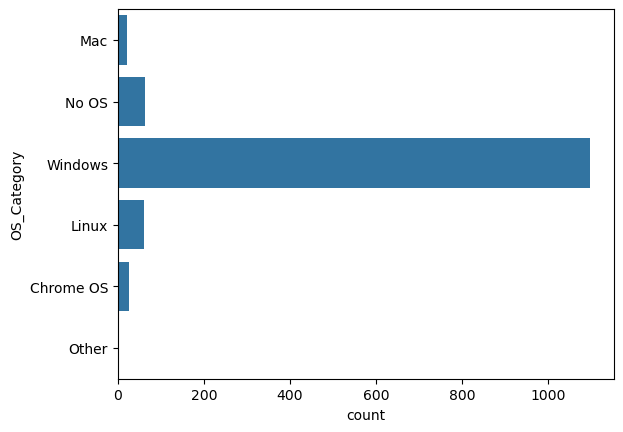

In [41]:
sns.countplot(cleaned_df,y='OS_Category')

<Axes: title={'center': 'Scatter plot of Price'}, ylabel='Price'>

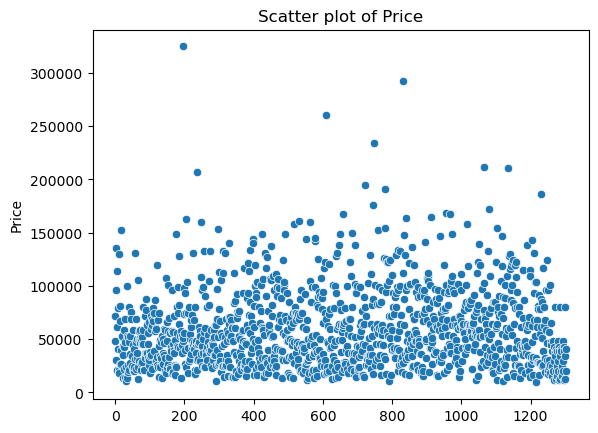

In [42]:
plt.title('Scatter plot of Price')
sns.scatterplot(cleaned_df['Price'])

plt.title('Distribution of Price')
sns.histplot(cleaned_df['Price'])

<Axes: title={'center': 'Checking Outliers in Price'}, ylabel='Price'>

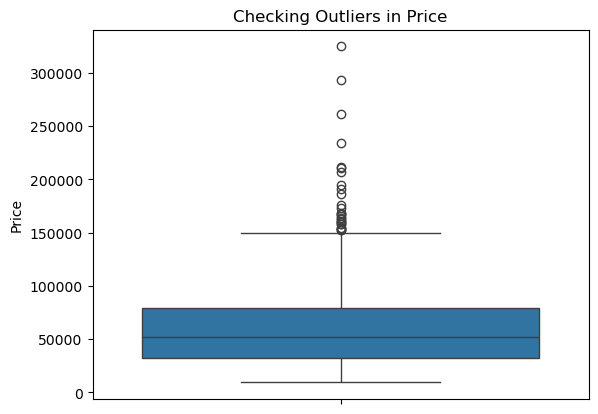

In [43]:
plt.title('Checking Outliers in Price')
sns.boxplot(cleaned_df['Price'])

In [44]:
cor = cleaned_df.select_dtypes(include='number').corr()

<Axes: >

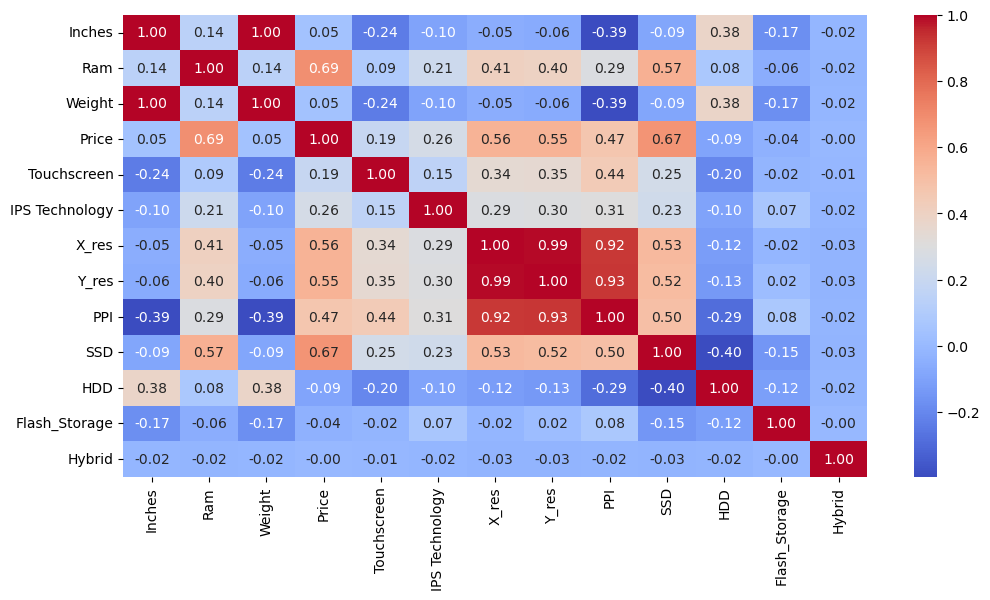

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,fmt='.2f',cmap='coolwarm')

## Preprocessing

In [46]:
# Outliers Detection using IQR method
q1 = cleaned_df['Price'].quantile(0.25)
q3 = cleaned_df['Price'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - IQR*1.5
upper_bound = q3 + IQR*1.5

outliers = cleaned_df[(cleaned_df['Price'] < lower_bound) | (cleaned_df['Price'] > upper_bound)]

In [47]:
#Removing Outliers
data=cleaned_df[(cleaned_df['Price'] >= lower_bound) & (cleaned_df['Price'] <= upper_bound)]

In [48]:
data.shape

(1243, 18)

### Encode Categorical Features

In [49]:
# Categorical columns to encode:
# Company
# TypeName
# Cpu_brand
# Gpu_brand
# OS_Category

In [50]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [51]:
from sklearn.compose import ColumnTransformer

In [52]:
features = ['Company','TypeName','Cpu_brand','Gpu_brand','OS_Category','Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS Technology',
       'X_res', 'Y_res', 'PPI', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid']

In [53]:
cat_features = ['Company','TypeName','Cpu_brand','Gpu_brand','OS_Category'] #categorical columns

In [54]:
num_features = ['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS Technology',
       'X_res', 'Y_res', 'PPI', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid'] #numeric columns

In [55]:
#BUild a column Transformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), cat_features)
])

In [56]:
X = data[features]

In [57]:
y = data['Price'] #Target Variable

### Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Typical split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Regression Model Development

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [61]:
models = {
    'Linear Regression' : LinearRegression(),
    'SVR' : SVR(),
    'DescisionTree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' :RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting Regressor':GradientBoostingRegressor()
}

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
results=[]

for name,model in models.items():
    pipe=Pipeline([
        ('preprocessor',preprocessor),
        ('regression',model)
    ])

    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name,mae,rmse,r2))

#### Evaluate and choose the model that aligns best with the project's objectives.

In [65]:
# Show results
results_df = pd.DataFrame(results, columns=["Model", "MAE","RMSE","R2_SCORE"])
results_df.sort_values(by="R2_SCORE", ascending=False)

,Model,MAE,RMSE,R2_SCORE
4,Gradient Boosting Regressor,10527.921970,14821.718599,0.798497
3,Random Forest Regressor,10394.064558,15265.882607,0.786239
0,Linear Regression,11629.305726,15936.929237,0.767034
2,DescisionTree Regressor,12005.498433,19071.801461,0.666368
1,SVR,25665.141795,33358.422148,-0.020692


### Hyperparameter Tuning:

In [66]:
#Since Gradient Boosting Regressor performed best, 
#we'll tune it using GridSearchCV to find the optimal parameters.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Define pipeline again with Gradient Boosting
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', GradientBoostingRegressor(random_state=42))
])

# Parameter grid for Gradient Boosting
param_grid = {
    'regression__n_estimators': [100, 200],
    'regression__learning_rate': [0.05, 0.1, 0.2],
    'regression__max_depth': [3, 5, 7]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best score and best parameters
print("Best R2 Score: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best R2 Score:  0.8080742589496059
Best Parameters:  {'regression__learning_rate': 0.2, 'regression__max_depth': 3, 'regression__n_estimators': 200}


In [68]:
# Extract the best estimator
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("RMSE: ", rmse)
print("R² Score: ", r2)

MAE:  9952.463552734658
RMSE:  13957.65198865602
R² Score:  0.8213066528349009


### Model Interpretation — Feature Importances

In [69]:
# This helps you (and SmartTech Co.) understand which features most influence laptop prices,
# fulfilling the “interpretability” goal from your project brief.

#### Get & Plot Feature Importances

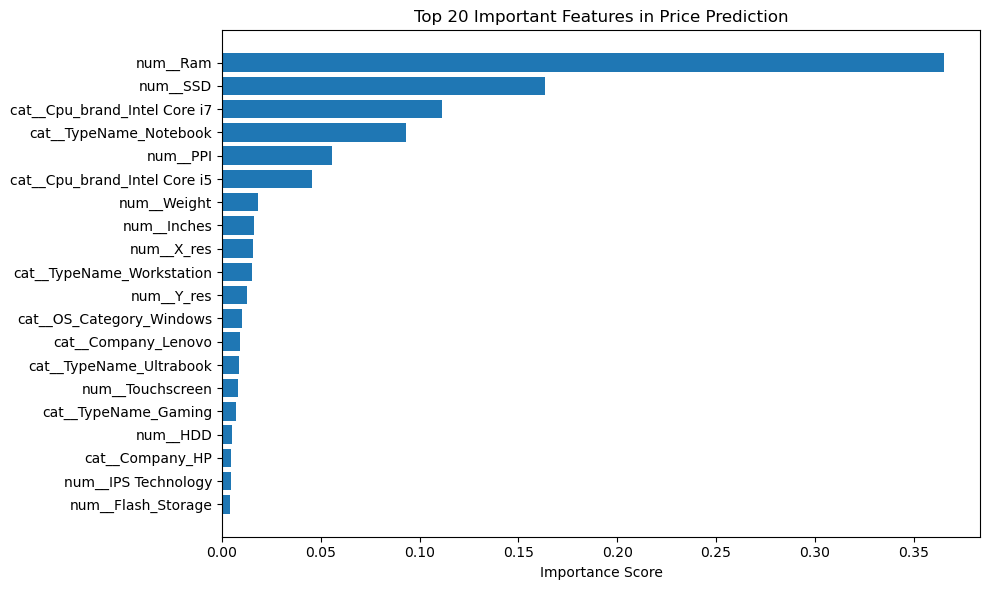

In [70]:
# 1. Extract regressor and preprocessor from trained pipeline
regressor = best_model.named_steps['regression']
preprocessor = best_model.named_steps['preprocessor']

# 2. Fit preprocessor separately on training data to get consistent feature names
preprocessor.fit(X_train)

# 3. Use get_feature_names_out on preprocessor directly
feature_names = preprocessor.get_feature_names_out()

# 4. Create DataFrame of importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 5. Plot top 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20][::-1], feat_imp_df['Importance'][:20][::-1])
plt.title("Top 20 Important Features in Price Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

###  Real-Time Laptop Price Prediction

In [71]:
# Create a dictionary for a new laptop
new_laptops_df = pd.read_csv(r"D:\ML\new_laptops.csv")

In [72]:
new_laptops_df.sample()

,Company,TypeName,Cpu_brand,Gpu_brand,OS_Category,Inches,Ram,Weight,Touchscreen,IPS Technology,X_res,Y_res,PPI,SSD,HDD,Flash_Storage,Hybrid
10,Apple,Ultrabook,Apple M2,Apple,Mac,14.0,16,1.6,0,1,3024,1964,254.73,512,0,0,0


In [73]:
predicted_prices = best_model.predict(new_laptops_df)

In [74]:
new_laptops_df['Predicted_Price'] = predicted_prices
new_laptops_df[['Company', 'TypeName', 'Cpu_brand', 'Predicted_Price']].head()


,Company,TypeName,Cpu_brand,Predicted_Price
0,Dell,Ultrabook,Intel Core i5,62935.407540
1,HP,Notebook,AMD Ryzen 5,43727.297136
2,Apple,Ultrabook,Apple M1,74659.174182
3,Lenovo,Gaming,Intel Core i7,92799.151789
4,Acer,Notebook,Intel Core i3,51179.321263


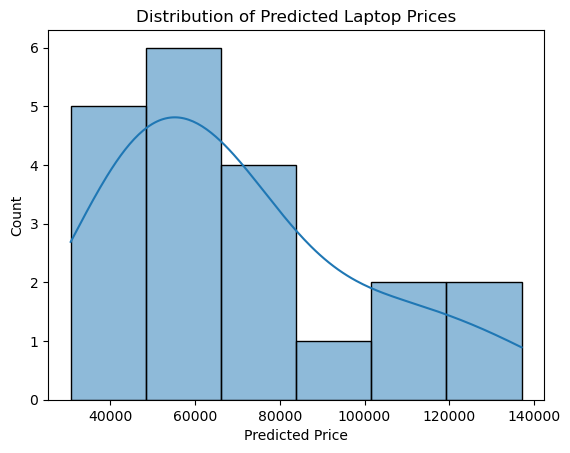

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(predicted_prices, kde=True)
plt.title("Distribution of Predicted Laptop Prices")
plt.xlabel("Predicted Price")
plt.show()


 #### 2. Can the model accurately predict the prices of laptops from lesser-known brands?

In [78]:
lesser_brands = ['MSI', 'Fujitsu', 'Samsung', 'Xiaomi', 'Google']
mask = X_test['Company'].isin(lesser_brands)

# Predict
y_pred_lesser = best_model.predict(X_test[mask])
y_true_lesser = y_test[mask]

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_true_lesser, y_pred_lesser))
print("RMSE:", np.sqrt(mean_squared_error(y_true_lesser, y_pred_lesser)))
print("R2 Score:", r2_score(y_true_lesser, y_pred_lesser))


MAE: 8732.123658273511
RMSE: 11318.85933504321
R2 Score: 0.8652980654417775


#### 3. Does the brand of the laptop significantly influence its price?

<Axes: xlabel='Company'>

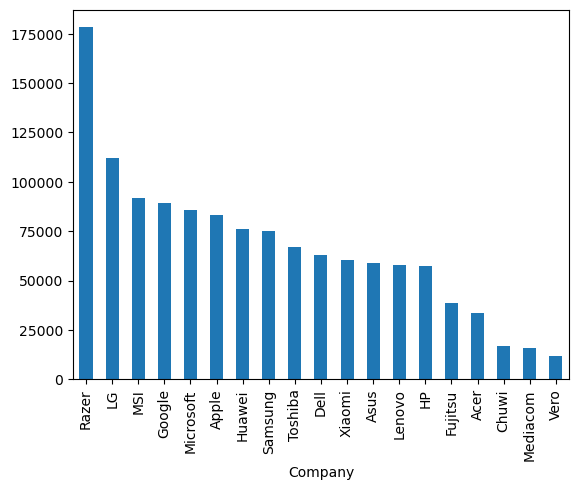

In [79]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False).plot(kind='bar')


#### 4. How well does the model perform on laptops with high-end specifications compared to budget laptops?

In [81]:
# Budget: Price < 50,000 | Premium: Price > 100,000
budget_mask = y_test < 50000
premium_mask = y_test > 100000

# Predict
y_pred_budget = best_model.predict(X_test[budget_mask])
y_pred_premium = best_model.predict(X_test[premium_mask])

print("Budget R2:", r2_score(y_test[budget_mask], y_pred_budget))
print("Premium R2:", r2_score(y_test[premium_mask], y_pred_premium))

Budget R2: 0.28470896272716206
Premium R2: -2.2732782585710196


#### 5. What are the limitations and challenges in predicting laptop prices accurately?

##### 🧠 Insights:
##### Subjective pricing factors like brand trust, warranty, customer service.
##### Rapid hardware evolution (new CPUs/GPUs) make it hard to generalize.
##### Missing values, dirty text data, and feature engineering limitations.
##### Overfitting to training data if not careful during model tuning.
##### Unseen categories can affect OneHotEncoding.

#### 6. How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

In [83]:
new_laptops_df.head() # New Data

,Company,TypeName,Cpu_brand,Gpu_brand,OS_Category,Inches,Ram,Weight,Touchscreen,IPS Technology,X_res,Y_res,PPI,SSD,HDD,Flash_Storage,Hybrid,Predicted_Price
0,Dell,Ultrabook,Intel Core i5,Intel,Windows,13.3,8,1.3,0,1,1920,1080,165.63,256,0,0,0,62935.407540
1,HP,Notebook,AMD Ryzen 5,AMD,Windows,15.6,16,2.0,0,1,1920,1080,141.21,512,0,0,0,43727.297136
2,Apple,Ultrabook,Apple M1,Apple,Mac,13.3,8,1.4,0,1,2560,1600,226.98,256,0,0,0,74659.174182
3,Lenovo,Gaming,Intel Core i7,Nvidia,Windows,17.3,16,2.7,0,1,1920,1080,127.34,512,1000,0,0,92799.151789
4,Acer,Notebook,Intel Core i3,Intel,Windows,14.0,4,1.9,0,0,1366,768,112.11,128,500,0,0,51179.321263


In [84]:
predicted_prices = best_model.predict(new_laptops_df)

In [85]:
new_laptops_df['Predicted_Price'] = predicted_prices
new_laptops_df[['Company', 'TypeName', 'Cpu_brand', 'Predicted_Price']].head()

,Company,TypeName,Cpu_brand,Predicted_Price
0,Dell,Ultrabook,Intel Core i5,62935.407540
1,HP,Notebook,AMD Ryzen 5,43727.297136
2,Apple,Ultrabook,Apple M1,74659.174182
3,Lenovo,Gaming,Intel Core i7,92799.151789
4,Acer,Notebook,Intel Core i3,51179.321263
